In [1]:
import pandas as pd
%config InlineBackend.figure_format = 'retina'

import demo.base
import importlib

importlib.reload(demo.base)
from demo.base import Demo, Frames, Statistics

In [151]:
prefixes = [
    # "demos/003539238673948082246_1158484874",
    # "demos/003539816235380244569_0456494363",
    # "demos/003539817927597359274_0028882144",
    # "demos/003539818058593861742_2121613707",
    # "demos/003539820079375974512_0437432291",
    # "demos/003539821202509922310_1932669846",
    # "demos/003539824982081142854_1688020804",
    "demos/003539831729474764830_0420161581",
    # "demos/003539834063789490326_1123833788",
    # "demos/003539835811841179828_0319654770",
    # "demos/003539837656529633385_0254743621"
]
for prefix in prefixes:
    print(f"Converting {prefix}")
    demo = Demo.load(f"{prefix}.dem", force=True, parse_rate=1)
    frames = Frames.from_demo(demo).dump(f"{prefix}.zip")

print("DONE")

Converting demos/003539831729474764830_0420161581
DONE


In [220]:
# del frames

prefix = "demos/003539831729474764830_0420161581"
demo = Demo.load(f"{prefix}.dem", force=True)
stats = Statistics.from_demo(demo, clear=False)
# frames = Frames.from_zip(f"{prefix}.zip", list(range(10, 23)))
rounds = Frames.from_zip(f"{prefix}.zip")

print(rounds[21]["mapName"].iloc[0])

print(rounds[21]["name"].unique())

de_cache
['zako' 'SHELLY' '天皓' '她与残局皆遗憾，一比十五我开转' 'John Ripper' 'wdnmd' 'Shiar112'
 'Serendipity' 'Steupid' 'sh1ro']


In [153]:
rounds[10:23]

,roundNum,tick,seconds,side,teamName,steamID,name,team,x,y,...,cash,cashSpendThisRound,cashSpendTotal,hasHelmet,hasDefuse,hasBomb,ping,zoomLevel,matchID,mapName
0,10,75412,0.00000,CT,,76561198361505224,Serendipity,,-1477.000000,503.000000,...,2100,5400,28000,True,False,False,225,0,3.539832e+28,de_cache
1,10,75412,0.00000,CT,,76561199202289325,Steupid,,-1564.000000,633.000000,...,2900,800,27500,True,False,False,51,0,3.539832e+28,de_cache
2,10,75412,0.00000,CT,,76561199180254613,wdnmd,,-1353.000000,645.000000,...,10550,0,16850,True,False,False,103,0,3.539832e+28,de_cache
3,10,75412,0.00000,CT,,76561198815607463,Shiar112,,-1414.000000,723.000000,...,200,3750,29600,True,False,False,104,0,3.539832e+28,de_cache
4,10,75412,0.00000,CT,,76561198362125598,sh1ro,,-1382.000000,815.000000,...,6650,600,18700,True,True,False,118,0,3.539832e+28,de_cache
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260235,22,139020,39.21875,T,,76561198362125598,sh1ro,,-913.660339,1227.450195,...,13100,0,50300,False,False,False,113,0,3.539832e+28,de_cache
260236,22,139020,39.21875,T,,76561198361505224,Serendipity,,-1622.019409,-143.792877,...,4100,0,58750,True,False,False,169,0,3.539832e+28,de_cache
260237,22,139020,39.21875,T,,76561199202289325,Steupid,,-661.697449,201.697723,...,6400,0,56200,True,False,False,55,0,3.539832e+28,de_cache
260238,22,139020,39.21875,T,,76561199180254613,wdnmd,,419.561462,1647.067993,...,7750,0,47400,False,False,False,110,0,3.539832e+28,de_cache


In [225]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib import pyplot as plt

name = "sh1ro"
# name = "John Ripper"

replay = rounds[1:31]
# replay = frames[14:21]

# df = df[["name", "roundNum", "tick", "viewX", "viewY"]]
# df = df[df["name"] == name]

replay["viewX"] = (replay["viewX"] + 180) % 360
replay["viewY"] = (replay["viewY"] + 180) % 360

replay = replay.sort_values(by=["tick"]).reset_index(drop=True)

# print(df[df['viewY'].diff() > 45.0]['tick'])

# for name, group in df.groupby(df.index // 64):
#     group[['viewX', 'viewY']].plot.hist(bins=12, range=[0, 360])

In [ ]:
fig, ax = plt.subplots()
grouped = ((name, group) for name, group in df.groupby(df.index // 64))

def update(frame):
    ax.clear()
    print(f"{frame}")
    _, group = next(grouped)
    return group[['viewX', 'viewY']].plot.hist(bins=12, range=[0, 360], ax=ax)

animation = FuncAnimation(fig, update, frames=161)

writer = PillowWriter(fps=1)
animation.save("demo.gif", writer=writer)

<AxesSubplot:xlabel='tick'>

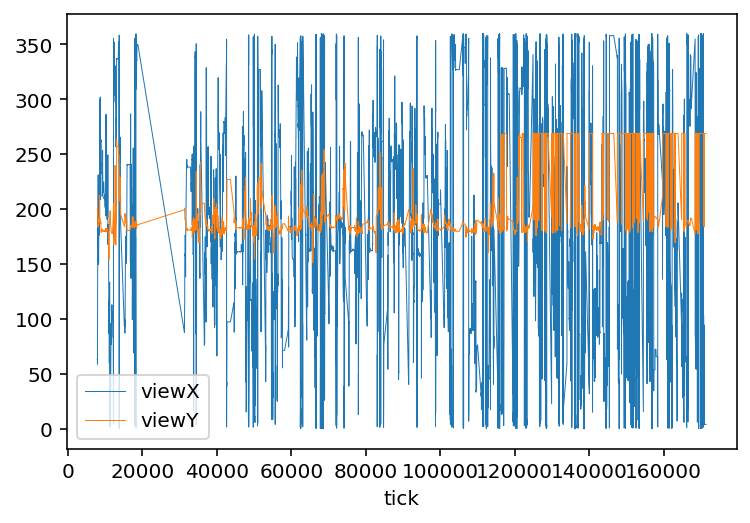

In [185]:
# from matplotlib import pyplot as plt
# plt.rcParams["figure.dpi"] = 200

replay[replay["name"] == "sh1ro"].plot(x='tick', y=['viewX', 'viewY'], linewidth=0.5)

<AxesSubplot:xlabel='tick'>

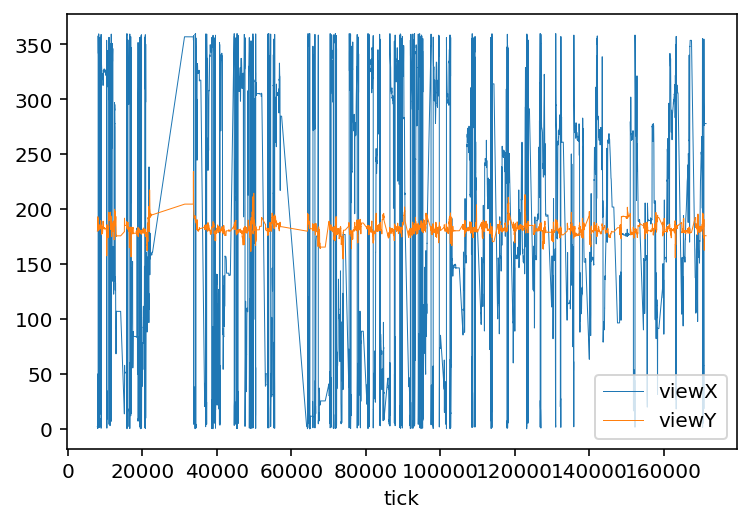

In [186]:
replay[replay["name"] == "John Ripper"].plot(x='tick', y=['viewX', 'viewY'], linewidth=0.5)

<AxesSubplot:ylabel='Frequency'>

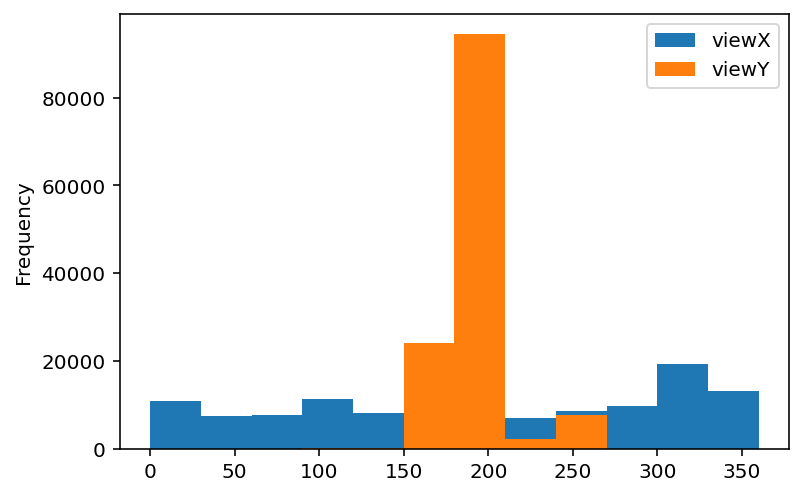

In [157]:
replay[['viewX', 'viewY']].plot.hist(bins=12, range=[0, 360])

In [134]:
def find_fast_aim(df: pd.DataFrame, threshold: float = 1000.0):
    ms_per_tick = 1 / 64

    time = df['tick'] * ms_per_tick
    df["dViewY"] = df['viewY'].diff() / time.diff()
    df["dViewX"] = df['viewX'].diff() / time.diff()
    df["dView"] = (df['dViewX'] ** 2 + df['dViewY'] ** 2) ** 0.5

    return df[(df['dView'] > threshold) & df['isAlive'] & (df['activeWeapon'] != 'Knife')]

In [142]:
# fast_aim = find_fast_aim(df[df["name"] == "John Ripper"])
fast_aim = find_fast_aim(replay[replay["name"] == "sh1ro"], 10.0)
fast_aim[['tick', 'viewX', 'viewY', 'dViewX', 'dViewY', 'dView']]

,tick,viewX,viewY,dViewX,dViewY,dView
1953,119862,344.729004,180.933838,-36.914063,-10.546875,38.391204
1964,119864,340.054321,180.823975,-149.589844,-3.515625,149.631150
1972,119866,334.110718,180.823975,-190.195313,0.000000,190.195313
1981,119868,328.666992,180.878906,-174.199219,1.757812,174.208087
1998,119870,325.585327,180.933838,-98.613281,1.757812,98.628947
...,...,...,...,...,...,...
40132,128466,358.934326,268.994751,11477.636719,0.000000,11477.636719
40149,128468,177.286377,178.472900,-5812.734375,-2896.699219,6494.516709
40174,128474,356.165771,268.994751,5724.140625,2896.699219,6415.345062
40201,128480,352.413940,268.994751,-120.058594,0.000000,120.058594


0        119470
1        119470
2        119470
3        119470
4        119470
          ...  
42385    128910
42386    128910
42387    128910
42388    128910
42389    128910
Name: tick, Length: 42390, dtype: int64

In [226]:
# fast_aim_by_name = fast_aim[fast_aim["name"] == "sh1ro"]
damages = demo.damages[demo.damages['attackerName'] == 'sh1ro']
# damages = demo.damages[demo.damages['attackerName'] == 'John Ripper']

tick_range = 10

hits = damages[damages["hpDamageTaken"] > 0]
hits["round_tick"] = (hits["tick"] // tick_range) * tick_range
fast_aim['round_tick'] = (fast_aim['tick'] // tick_range) * tick_range

# suspect.merge(fast_aim['round_tick'], how="inner", on="round_tick").drop_duplicates()
#
# fast_aim_by_name
#
# suspect[suspect["tick"] > 120_000]


hits.merge(replay['tick'], how="inner", on="tick")

,tick,seconds,clockTime,attackerSteamID,attackerName,attackerTeam,attackerSide,attackerX,attackerY,attackerZ,...,armorDamage,armorDamageTaken,hitGroup,isFriendlyFire,distance,zoomLevel,roundNum,matchID,mapName,round_tick
0,11086,49.21875,01:06,7.656120e+16,sh1ro,,CT,523.692200,170.574402,1613.39270,...,0,0,Head,False,487.089914,0.0,1,003539831729474764830_0420161581,de_cache,11080
1,11086,49.21875,01:06,7.656120e+16,sh1ro,,CT,523.692200,170.574402,1613.39270,...,0,0,Head,False,487.089914,0.0,1,003539831729474764830_0420161581,de_cache,11080
2,11086,49.21875,01:06,7.656120e+16,sh1ro,,CT,523.692200,170.574402,1613.39270,...,0,0,Head,False,487.089914,0.0,1,003539831729474764830_0420161581,de_cache,11080
3,11086,49.21875,01:06,7.656120e+16,sh1ro,,CT,523.692200,170.574402,1613.39270,...,0,0,Head,False,487.089914,0.0,1,003539831729474764830_0420161581,de_cache,11080
4,11086,49.21875,01:06,7.656120e+16,sh1ro,,CT,523.692200,170.574402,1613.39270,...,0,0,Head,False,487.089914,0.0,1,003539831729474764830_0420161581,de_cache,11080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,176450,6.96875,00:34,7.656120e+16,sh1ro,,T,-913.513367,1147.098389,1687.03125,...,18,18,Head,False,1603.944542,1.0,29,003539831729474764830_0420161581,de_cache,176450
1028,176450,6.96875,00:34,7.656120e+16,sh1ro,,T,-913.513367,1147.098389,1687.03125,...,18,18,Head,False,1603.944542,1.0,29,003539831729474764830_0420161581,de_cache,176450
1029,176450,6.96875,00:34,7.656120e+16,sh1ro,,T,-913.513367,1147.098389,1687.03125,...,18,18,Head,False,1603.944542,1.0,29,003539831729474764830_0420161581,de_cache,176450
1030,176450,6.96875,00:34,7.656120e+16,sh1ro,,T,-913.513367,1147.098389,1687.03125,...,18,18,Head,False,1603.944542,1.0,29,003539831729474764830_0420161581,de_cache,176450


<AxesSubplot:xlabel='tick'>

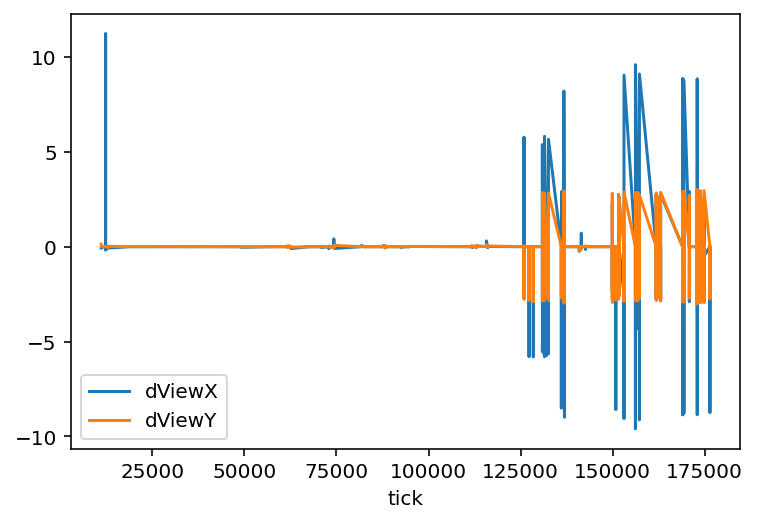

In [299]:
import numpy as np

name = 'sh1ro'

player_replay = replay[replay['name'] == name].reset_index()
player_attacks = demo.damages[demo.damages['attackerName'] == name]
player_hits = player_attacks[damages["hpDamageTaken"] > 0].reset_index()

# player_replay.merge(player_hits, how="inner", on="tick")
# player_replay.where()

# player_replay['tick'] > player_hits['tick']

replay_ticks = player_replay["tick"].values
hits_ticks = player_hits["tick"].values

i, j = np.where((replay_ticks[:, None] > hits_ticks - 4) & (replay_ticks[:, None] < hits_ticks + 4))

hit_frames = player_replay.loc[i, :].reset_index(drop=True)

# hit_frames = pd.concat([
#     player_replay.loc[i, :].reset_index(drop=True),
#     player_hits.loc[j, :].reset_index(drop=True)
# ], axis=1).drop(columns=["index"])
#
# hit_frames["viewX"]
#
ms_per_tick = 1000 / 64

time = hit_frames['tick'] * ms_per_tick

hit_frames["dViewY"] = hit_frames['viewY'].diff() / time.diff()
hit_frames["dViewX"] = hit_frames['viewX'].diff() / time.diff()
hit_frames["dView"] = (hit_frames['dViewX'] ** 2 + hit_frames['dViewY'] ** 2) ** 0.5

hit_frames.plot(x="tick", y=["dViewX", "dViewY"])

In [267]:
player_replay.loc[1571]

index                                                    15718
roundNum                                                     1
tick                                                     11078
seconds                                               49.09375
side                                                        CT
teamName                                                      
steamID                                      76561198362125598
name                                                     sh1ro
team                                                          
x                                                   512.129822
y                                                   172.339294
z                                                  1613.353394
velocityX                                           121.916275
velocityY                                           -26.673212
velocityZ                                                  0.0
viewX                                                93

In [266]:
player_hits

,index,tick,seconds,clockTime,attackerSteamID,attackerName,attackerTeam,attackerSide,attackerX,attackerY,...,hpDamageTaken,armorDamage,armorDamageTaken,hitGroup,isFriendlyFire,distance,zoomLevel,roundNum,matchID,mapName
0,19,11086,49.21875,01:06,7.656120e+16,sh1ro,,CT,523.692200,170.574402,...,43,0,0,Head,False,487.089914,0.0,1,003539831729474764830_0420161581,de_cache
1,23,12280,10.09375,00:30,7.656120e+16,sh1ro,,CT,135.175659,-1370.571045,...,16,0,0,Generic,False,54.482553,0.0,1,003539831729474764830_0420161581,de_cache
2,27,13026,21.75000,00:19,7.656120e+16,sh1ro,,CT,-29.630369,-1258.430664,...,19,9,9,Stomach,False,550.977987,0.0,1,003539831729474764830_0420161581,de_cache
3,28,13036,21.90625,00:19,7.656120e+16,sh1ro,,CT,-29.630369,-1258.430664,...,19,9,9,Stomach,False,540.334125,0.0,1,003539831729474764830_0420161581,de_cache
4,29,13048,22.09375,00:18,7.656120e+16,sh1ro,,CT,-33.386242,-1259.118652,...,17,0,0,Head,False,530.431684,0.0,1,003539831729474764830_0420161581,de_cache
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,469,173840,23.78125,01:32,7.656120e+16,sh1ro,,T,940.732361,155.191467,...,54,0,0,Head,False,1094.684624,1.0,29,003539831729474764830_0420161581,de_cache
100,470,173856,24.03125,01:31,7.656120e+16,sh1ro,,T,941.683167,158.728775,...,11,0,0,Head,False,1094.302011,1.0,29,003539831729474764830_0420161581,de_cache
101,475,174826,39.18750,01:16,7.656120e+16,sh1ro,,T,-24.163128,374.471954,...,35,0,0,Stomach,False,1636.187873,1.0,29,003539831729474764830_0420161581,de_cache
102,476,174842,39.43750,01:16,7.656120e+16,sh1ro,,T,-19.873215,374.459869,...,1,0,0,Chest,False,934.518568,1.0,29,003539831729474764830_0420161581,de_cache
